In [2]:
!pip install keras
import keras

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
!pip install tensorflow
import tensorflow

In [18]:
import numpy as np
import random
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten

In [10]:
X_train = np.loadtxt('/content/drive/MyDrive/input.csv', delimiter = ',')
Y_train = np.loadtxt('/content/drive/MyDrive/labels.csv', delimiter = ',')

X_test = np.loadtxt('/content/drive/MyDrive/input_test.csv', delimiter = ',')
Y_test = np.loadtxt('/content/drive/MyDrive/labels_test.csv', delimiter = ',')

In [14]:
X_train = X_train.reshape(len(X_train), 100, 100, 3)
Y_train = Y_train.reshape(len(Y_train), 1)

X_test = X_test.reshape(len(X_test), 100, 100, 3)
Y_test = Y_test.reshape(len(Y_test), 1)

X_train = X_train/255.0
X_test = X_test/255.0

In [12]:
print("Shape of X_train", X_train.shape)
print("Shape of Y_train", Y_train.shape)
print("Shape of X_test", X_test.shape)
print("Shape of Y_test", Y_test.shape)

Shape of X_train (2000, 100, 100, 3)
Shape of Y_train (2000, 1)
Shape of X_test (400, 100, 100, 3)
Shape of Y_test (400, 1)


In [ ]:
X_train[1,:]

In [ ]:
idx = random.randint(0, len(X_train))
plt.imshow(X_train[idx, :])
plt.show()

In [ ]:
model = Sequential([
    Conv2D(32, (3,3), activation = 'relu', input_shape = (100, 100,3)),
    MaxPooling2D((2,2)),

    Conv2D(32, (3,3),  activation = 'relu'),
    MaxPooling2D((2,2)),

    Flatten(),
    Dense(64, activation = 'relu'),
    Dense(1, activation = 'sigmoid')
])

In [21]:
model = Sequential()
model.add(Conv2D(32, (3,3), activation = 'relu', input_shape = (100, 100,3)))
model.add(MaxPooling2D((2,2)),)

model.add(Conv2D(32, (3,3),  activation = 'relu'))
model.add(MaxPooling2D((2,2)))

model.add(Flatten())
model.add(Dense(64, activation = 'relu'))
model.add(Dense(1, activation = 'sigmoid'))

In [24]:
model.compile(loss = 'binary_crossentropy' , optimizer = 'adam', metrics = ['accuracy']) 

In [38]:
model.fit(X_train, Y_train, epochs = 5, batch_size = 64)

Epoch 1/5
32/32 [==============================] - 20s 628ms/step - loss: 0.2567 - accuracy: 0.8980
Epoch 2/5
32/32 [==============================] - 20s 633ms/step - loss: 0.2105 - accuracy: 0.9280
Epoch 3/5
32/32 [==============================] - 20s 637ms/step - loss: 0.1747 - accuracy: 0.9405
Epoch 4/5
32/32 [==============================] - 22s 689ms/step - loss: 0.1519 - accuracy: 0.9505
Epoch 5/5
32/32 [==============================] - 20s 631ms/step - loss: 0.1055 - accuracy: 0.9720


In [40]:
model.evaluate(X_test, Y_test)

13/13 [==============================] - 1s 87ms/step - loss: 0.9019 - accuracy: 0.6700


[0.9019067287445068, 0.6700000166893005]

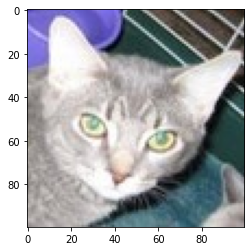

[[0.6908729]]
Our model says it is a : cat


In [51]:
idx2 = random.randint(0, len(Y_test))
plt.imshow(X_test[idx2, :])
plt.show()

y_pred = model.predict(X_test[idx2, :].reshape(1, 100,100, 3))
print(y_pred)

y_pred = y_pred >0.5

if(y_pred == 0):
  pred = 'dog' 
else:
  pred = 'cat'
print("Our model says it is a :", pred)